In [5]:
import pandas as pd
import numpy as np

In [72]:
attributes = pd.read_csv("../project_data/finished_attributes_engineering.csv",names=['SiteID', 'PlotNo', 'CentralAssetID', "AttrHD52","AttrNameHD5","AttrHD41",
"AttrNameHD41",
"AttrHD39",
"AttrNameHD39",
"AttrHD57",
"AttrNameHD57",
"AttrHD51",
"AttrNameHD51",
"AttrHD76",
"AttrNameHD76",
"AttrHD14",
"AttrNameHD14",
"AttrHD06",
"AttrNameHD06",
"AttrHD13",
"AttrNameHD13",
"AttrHD16",
"AttrNameHD16",
"AttrHD17",
"AttrNameHD17",
"AttrHD07",
"AttrNameHD07",
"AttrHD19",
"AttrNameHD19",
"AttrXSP",
"AttrNameXSP",
"AttrHD05",
"AttrNameHD05",
"AttrHD04",
"AttrNameHD04","ExtractTimestamp"], header=None,index_col=False)

FileNotFoundError: [Errno 2] No such file or directory: '../project_data/finished_attributes_engineering.csv'

In [8]:
interventions = pd.read_csv("/home/tgraham/Documents/MSC/project_data/interventions_dataset.csv",names=[
"JobID"
,"CentralAssetID"
,"SiteID"
,"PlotNo"
,"AssetTypeID"
,"LogNo"
,"EntryDateTime"
,"Notes"
,"JobTypeID"
,"JobTypeCode"
,"JobTypeName"
,"JobStatusID"
,"FloodHotspot"
,"JobStatusName"
,"PriorityID"
,"PriorityName"
,"ActualStartingDateTime"
,"ActualCompletionDateTime"
,"ActualCompletionYearMonth"
,"RouteID"
,"ParameterTypeID"
,"ParameterValueID"
,"IsDeletedFlag"
,"IsCurrentFlag"
,"ValidFromDateTime"
,"ValidToDateTime"
,"InsertedDateTime"
,"JobItemID"
,"SorItemID"
,"ExtractTimestamp"],header=None,index_col=False)

/tmp/ipykernel_9495/4092057552.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interventions = pd.read_csv("/home/tgraham/Documents/MSC/project_data/interventions_dataset.csv",names=[


In [20]:
demo = interventions[["JobID"
,"SiteID"
,"PlotNo"
,"Notes"
,"FloodHotspot"
,"JobStatusName"
,"ActualCompletionDateTime"
,"RouteID"
,"ParameterValueID"]]

In [21]:
demo = demo.rename(columns={"ParameterValueID":"PercentageFull"})

In [22]:
demo["Notes"] = demo["Notes"].apply(lambda x: x[0:25])

In [23]:
demo

,JobID,SiteID,PlotNo,Notes,FloodHotspot,JobStatusName,ActualCompletionDateTime,RouteID,PercentageFull
0,42887971,NW13000193,260022.0,4.3.1 Clean empty gullies,0,Job Closed,2021-12-05 20:49:38.0000000,1302,2550
1,42245464,SW21001920,260435.0,Nov - Jan: (DR: Gullies,1,Work Complete,2021-03-15 20:36:56.0000000,3034,2550
2,42243698,SW21001668,260168.0,Nov - Jan: (DR: Gullies -,1,Work Complete,2021-03-23 13:52:42.0000000,3031,NaN
3,42305555,SW21000794,260004.0,DR: Gullies - clear cover,1,Work Complete,2021-03-18 10:12:20.0000000,3804,CLEA
4,42245486,SW21001920,260647.0,Nov - Jan: (DR: Gullies,1,Work Complete,2021-03-15 21:22:35.0000000,3034,2550
...,...,...,...,...,...,...,...,...,...
1022558,58100499,NW10001791,260018.0,4.3.1.1 Gullies; gully em,0,Job Closed,2022-09-03 03:54:29.0000000,M115,NK
1022559,46428047,EA68002592,260013.0,4.3.1.2 Clean Covers and,0,Job Closed,2022-07-02 02:32:30.0000000,E031,NK
1022560,49695855,SE04000113,260083.0,Created by Repeating Jobs,0,Job Closed,2021-08-04 22:13:55.0000000,4187,NK
1022561,42414612,SW21001788,260104.0,Nov - Jan: (DR: Gullies,0,Work Complete,2022-03-25 12:06:42.0000000,3605,NK


In [4]:
interventions.groupby("CentralAssetID",as_index=False)["JobID"].count()

,CentralAssetID,JobID
0,00000000001000000147,3
1,00000000001000000148,3
2,00000000001000000149,3
3,00000000001000000150,3
4,00000000001000000151,3
...,...,...
198251,DRGU/A66000703,12
198252,DRGU/A66000704,12
198253,DRGU/A66000705,13
198254,DRGU/A66000706,13


In [5]:
def formatting_failure_vs_maintenance(string): 
    if string.find("B") != -1:
        return 1
    else:
        return 0

interventions["Failure_or_Maintenance"] = interventions["JobTypeCode"].apply(formatting_failure_vs_maintenance)

def create_prefix(siteid):
    return siteid[0:4]

interventions["prefix"] = interventions["SiteID"].apply(create_prefix)

In [6]:
interventions = interventions[(interventions["IsCurrentFlag"]==1)&(interventions["IsDeletedFlag"]==0)]

In [ ]:
interventions = interventions.groupby(['JobID', 'CentralAssetID','EntryDateTime','Notes','FloodHotspot', 'JobStatusName', 'PriorityID',
       'PriorityName','ActualCompletionDateTime', 'RouteID', 'ParameterTypeID',
       'ParameterValueID', 'ExtractTimestamp', 'Failure_or_Maintenance'],as_index=False)["ValidFromDateTime"].max()

In [ ]:
interventions.drop(columns="ValidFromDateTime",inplace=True)

In [ ]:
reactive_data = interventions[interventions["Failure_or_Maintenance"]==1].copy()
cyclic_data = interventions[interventions["Failure_or_Maintenance"]==0].copy()

In [181]:
key_words_covered = ["covered","leaves","Covered","Leaves","Clear","clear","CLEAR","cleared","CLEARED","clearing","cleaning","Cleaning","tops","top","mouth","mouths",
                     "debris","Debris","swept","Sweep","SWEPT","SWEEP","sweep","uncover","Uncover","grate","Obstruction","obstructed","detritus","Detritus","DETRITUS","Free flow impeded"]
key_words_full = ["empty","Empty","emptying","Emptying","gully cleaning","cleansing","cleaning out","jet","Jet","jetted","Jetted","Jetting","sucking","Sucking","sucker","SUCKER",
                 "sucked","Sucked","Suck","SUCK","suck","vac","blocked","Blocked","blockage","Blockage","unblock","Unblock","blocking","Blockage","Silt","silted","silt","Clean out gully"]
key_words_broken = ["collapsing","sunken","Collapsing","Sunken","Reset","reset","re-setting","Broken","broken","replace",
                    "Replace","collapsed","Collapsed","COLLAPSED","pothole","Pothole","POTHOLE","RESET","fit","Fit","FIT",
                   "Adjust","ADJUST","adjust","repair","Repair","missing","Missing","replacing","Replace","REPLACE","REPLACING",
                   "cracked","Cracked","CRACKED","Sandbag","sandbag","Sandbags","SANDBAG","breaking","Breaking","dislodged","Dislodged","misaligned",
                   "Misaligned","degraded","Degraded","frame","Frame","Rattling","rattling","REPAIR","setting","Setting","re-set","Raise",
                    "Hole","hole","patch","Patch","damage","Damage","rocking","Rocking","sunk","Sunk","SUNK","CCTV","cctv","reseating","collapse",
                   "Reinstate","level with","Level with","unseize","seize","Unseize","Seize","broken","New gully lid required","no lid","No lid","lid open","Lid popped out"]

reactive_data["covered_key_word_count"] = 0
reactive_data["full_key_word_count"] = 0
reactive_data["broken_key_word_count"] = 0 
cyclic_data["covered_key_word_count"] = 0
cyclic_data["full_key_word_count"] = 0
cyclic_data["broken_key_word_count"] = 0 
count = 0
for item in reactive_data["Notes"]:
    count += 1
    count_of_covered_key_words=0
    for key_word in key_words_covered:
        if item.find(key_word) != -1:
            count_of_covered_key_words += 1
    reactive_data.loc[reactive_data["Notes"] == item, "covered_key_word_count"] = count_of_covered_key_words

    count_of_full_key_words=0
    for key_word in key_words_full:
        if item.find(key_word) != -1:
            count_of_full_key_words += 1
    reactive_data.loc[reactive_data["Notes"] == item, "full_key_word_count"] = count_of_full_key_words
    
    count_of_broken_key_words=0
    for key_word in key_words_broken:
        if item.find(key_word) != -1:
            count_of_broken_key_words += 1
    reactive_data.loc[reactive_data["Notes"] == item, "broken_key_word_count"] = count_of_broken_key_words

    if count % 1000 == 0 :
        print(count)

1000
2000
3000
4000


### I am selecting the earliest instance of the job because this will be closest to when the failure occured. -- NO LONGER AN ISSUE - all data is created at the same time, the JobItems are created at the same time

In [182]:
cyclic_data

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,covered_key_word_count,full_key_word_count,broken_key_word_count
224,40328832,A03PO/DRGU039900,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 10:26:34.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
225,40328833,A03PO/DRGU064784,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 10:18:50.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
226,40328835,A03PO/DRGU010165,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 13:55:11.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
227,40328836,A03PO/DRGU029866,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 11:39:52.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
228,40328837,A03PO/DRGU044845,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 14:40:07.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568710,58156828,DR/HEA10/DRGU/043753,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:21:00.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568711,58156829,DR/HEA10/DRGU/043747,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:09.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568712,58156830,DR/HEA10/DRGU/043748,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Substantiation Passed,2MTH,2 Month - Commit,2023-04-02 22:36:46.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568713,58156831,DR/HEA10/DRGU/043746,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:33.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0


In [183]:
interventions = pd.concat([reactive_data,cyclic_data])

In [184]:
interventions

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,covered_key_word_count,full_key_word_count,broken_key_word_count
0,12000016,A12SDRGU00004594,2021-06-18 10:49:31.0000000,3 x blocked gully EB 1 x WB (DR: Blockage),0,Job Closed,24HR,24 Hours,2021-06-19 08:07:55.0000000,NO76,%FUL,7510,2023-04-21 10:59:09.627,1,0,3,0
1,12002351,A12GU00010060,2021-10-26 11:12:15.0000000,Sunken gully needs re-bedding to raise.,0,Job Closed,28DY,28 days,2021-11-09 04:03:52.0000000,NO96,%FUL,0-25,2023-04-21 10:59:09.627,1,0,0,2
2,12002726,A12GU00019535,2021-11-24 14:13:39.0000000,Gully grate collapsed lower than road (DR: Dra...,0,Work Complete,R,* Priority - Change Me,2021-11-24 14:18:34.0000000,NO87,%FUL,2550,2023-04-21 10:59:09.627,1,1,0,3
3,12002785,A12GU00011223,2021-11-29 12:23:36.0000000,1 sunken gully requires resetting in lane 1 M1...,0,Work Complete,28DY,28 days,2021-12-08 07:31:56.0000000,NO87,%FUL,NK,2023-04-21 10:59:09.627,1,1,0,5
4,12003189,A12GU00005763,2022-01-05 10:01:55.0000000,Clean test and prove gullies. Remove thermopla...,0,Work Complete,28DY,28 days,2022-07-26 01:01:43.0000000,NO41,%FUL,7510,2023-04-21 10:59:09.627,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568710,58156828,DR/HEA10/DRGU/043753,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:21:00.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568711,58156829,DR/HEA10/DRGU/043747,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:09.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568712,58156830,DR/HEA10/DRGU/043748,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Substantiation Passed,2MTH,2 Month - Commit,2023-04-02 22:36:46.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568713,58156831,DR/HEA10/DRGU/043746,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:33.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0


In [185]:
interventions["full_key_word_count"].value_counts()

0    565486
1      1096
3       879
2       727
4       350
5        75
6        70
8        26
7         6
9         1
Name: full_key_word_count, dtype: int64

In [186]:
interventions[(interventions["ParameterValueID"] == "7510")&(interventions["Failure_or_Maintenance"]==1)]["full_key_word_count"].value_counts()

1    385
3    320
0    259
2    242
4     95
6     50
5     39
8     24
7      5
9      1
Name: full_key_word_count, dtype: int64

Below shows all the gullies which were between 75%-100% full when inspected but the text analysis does not classify it as a full gully. This could be due to the gully not being "observed" to be full or it could be due to it being towards the bottom of the range and it is still functional say in the 75-85% full range

In [188]:
for index, row in interventions[(interventions["ParameterValueID"] == "7510")&(interventions["Failure_or_Maintenance"]==1)&(interventions["full_key_word_count"]==0)][0:50].iterrows():
    print(row["Notes"])

Clean test and prove gullies. Remove thermoplastic from the gully tops for them to be opened to carry out maintenance.  Renew any gully frames and lids that are seized Please provide photo evidence of any gullies that are filled with tarmac and road plainings. 
Replace missing gully lid. Will require breaking out kerb to install new size gully. Remove ID cone from site once works are complete.  SEE PICTURE ATTACHED FOR DEFECT
Investigate flooding problem & rectify if possible. If not produce a report on the issues,.
Reset / replace gully frame & lid & patch surfacing. 1M x 1M  x 100mm. L1 closure
NS Gulley grating (split triangle) broken  (500mm x 500mm) - requires replacing (DR: Loose/Rocking Cover)
Perm repair: replace drainage cover. Has been made safe and marked with cone.
IN: Drainage Systems - 2 DRAINS + CHAMBER THAT NEEDS CLEARING - THE CHAMBER HAS A YELLOW SANDBAG AND THE DRAINS HAVE DEBRIS ON THEM - NEEDS CLEARING FOR THE INCOMING RAINS  (Enquiry 37108196)
Free flow impeded in

In [189]:
text_analysis_quality = interventions[interventions["Failure_or_Maintenance"]==1]

In [191]:
text_analysis_quality

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,covered_key_word_count,full_key_word_count,broken_key_word_count
0,12000016,A12SDRGU00004594,2021-06-18 10:49:31.0000000,3 x blocked gully EB 1 x WB (DR: Blockage),0,Job Closed,24HR,24 Hours,2021-06-19 08:07:55.0000000,NO76,%FUL,7510,2023-04-21 10:59:09.627,1,0,1,0
1,12002351,A12GU00010060,2021-10-26 11:12:15.0000000,Sunken gully needs re-bedding to raise.,0,Job Closed,28DY,28 days,2021-11-09 04:03:52.0000000,NO96,%FUL,0-25,2023-04-21 10:59:09.627,1,0,0,1
2,12002726,A12GU00019535,2021-11-24 14:13:39.0000000,Gully grate collapsed lower than road (DR: Dra...,0,Work Complete,R,* Priority - Change Me,2021-11-24 14:18:34.0000000,NO87,%FUL,2550,2023-04-21 10:59:09.627,1,1,0,1
3,12002785,A12GU00011223,2021-11-29 12:23:36.0000000,1 sunken gully requires resetting in lane 1 M1...,0,Work Complete,28DY,28 days,2021-12-08 07:31:56.0000000,NO87,%FUL,NK,2023-04-21 10:59:09.627,1,1,0,1
4,12003189,A12GU00005763,2022-01-05 10:01:55.0000000,Clean test and prove gullies. Remove thermopla...,0,Work Complete,28DY,28 days,2022-07-26 01:01:43.0000000,NO41,%FUL,7510,2023-04-21 10:59:09.627,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566320,58148171,DR/HEA10/DRGU/000546,2022-12-07 10:44:46.0000000,MAKE SAFE x 1 blocked gully - NS kerb Located ...,0,Work Complete,24HR,24 Hours,2022-12-07 12:04:06.0000000,M004,%FUL,7510,2023-04-21 10:59:09.627,1,0,1,0
566321,58148241,DR/HEA10/DRGU/034430,2022-12-09 13:55:58.0000000,Lid/Cover Broken or Seized 4.3.1.1 Gullies; gu...,0,Work Complete,2MON,2 Months,2023-04-13 11:02:52.0000000,M112,%FUL,0-25,2023-04-21 10:59:09.627,1,1,1,1
566322,58148955,DR/HEA10/DRGU/024896,2022-12-28 10:01:08.0000000,"Offside gully channel blocked, needs clearing....",0,Work Complete,24HC,24 Hours - Commit,2022-12-28 15:27:59.0000000,M092,%FUL,CLEA,2023-04-21 10:59:09.627,1,1,1,0
566323,58149402,DR/HEA10/DRGU/034212,2023-01-15 08:59:55.0000000,Flooding Gully cover cleared of debris (Drain...,0,Work Complete,FNOW,Fix Now - Internal,2023-01-15 09:02:10.0000000,M111,%FUL,0-25,2023-04-21 10:59:09.627,1,1,0,0


In [192]:
text_analysis_quality["Full_or_Not"] = text_analysis_quality["ParameterValueID"].apply(lambda x: 1 if x == "7510" else 0)

/tmp/ipykernel_42849/3432591412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_analysis_quality["Full_or_Not"] = text_analysis_quality["ParameterValueID"].apply(lambda x: 1 if x == "7510" else 0)


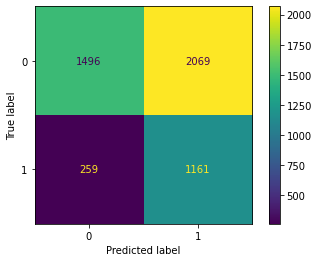

In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = text_analysis_quality["Full_or_Not"]
y_pred = text_analysis_quality["full_key_word_count"]
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [194]:
y_pred.value_counts()

1    3230
0    1755
Name: full_key_word_count, dtype: int64

In [195]:
y_true.value_counts()

0    3565
1    1420
Name: Full_or_Not, dtype: int64

### Initially Change 1 to zero for full_key_word_count which = 1 and ParameterValueID != 7510
<br> We have confidence that this is the case as a gully cannot be blocked and full up with debris as well the measured fullness not being 75-100% 

In [196]:
for index, row in text_analysis_quality.iterrows():
    if row["full_key_word_count"] > 0 and row["ParameterValueID"] != '7510':
            text_analysis_quality.loc[index, "full_key_word_count"] = 0


/home/tgraham/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [77]:
for item in text_analysis_quality[(text_analysis_quality["ParameterValueID"]=='7510')&(text_analysis_quality["full_key_word_count"] == 0)]["Notes"][0:50]:
    print(item)

Clean test and prove gullies. Remove thermoplastic from the gully tops for them to be opened to carry out maintenance.  Renew any gully frames and lids that are seized Please provide photo evidence of any gullies that are filled with tarmac and road plainings. 
Replace missing gully lid. Will require breaking out kerb to install new size gully. Remove ID cone from site once works are complete.  SEE PICTURE ATTACHED FOR DEFECT
Investigate flooding problem & rectify if possible. If not produce a report on the issues,.
Reset / replace gully frame & lid & patch surfacing. 1M x 1M  x 100mm. L1 closure
NS Gulley grating (split triangle) broken  (500mm x 500mm) - requires replacing (DR: Loose/Rocking Cover)
Perm repair: replace drainage cover. Has been made safe and marked with cone.
IN: Drainage Systems - 2 DRAINS + CHAMBER THAT NEEDS CLEARING - THE CHAMBER HAS A YELLOW SANDBAG AND THE DRAINS HAVE DEBRIS ON THEM - NEEDS CLEARING FOR THE INCOMING RAINS  (Enquiry 37108196)
Free flow impeded in

### Due to us now having a validation mechanism of the % full we can cast a winder net to capture more full gullies with the new confidence that a gully will not be classified as full if it is not between 75-100% full

In [197]:
key_words_covered = ["covered","leaves","Covered","Leaves","Clear","clear","CLEAR","cleared","CLEARED","clearing","cleaning","top blocked","Cleaning","mouth","mouths",
                     "debris","Debris","swept","Sweep","SWEPT","SWEEP","sweep","uncover","Uncover","grate","Obstruction","obstructed","detritus","Detritus","DETRITUS",
                     "Free flow impeded","Fix now","leaf","leaves","Fall","fall","Clear blocked gully grating","clear covers","Clear gully cover","Blocked gully tops"]
key_words_full = ["empty","Empty","emptying","Emptying","gully cleaning","cleansing","cleaning out","jet","Jet","jetted","Jetted","Jetting","sucking","Sucking","sucker","SUCKER",
                 "sucked","Sucked","Suck","SUCK","suck","vac","blocked","Blocked","blockage","Blockage","unblock","Unblock","blocking","Blockage","Silt","silted","silt","Clean out gully","Flooding","flooding","filled","Soil"
                 ,"Cleared","debris","Debris","clearing","detritus","cleaning","CLEARING","FLOOD","BLOCKED","Standing water","standing","Please clear 8 gullies","full of mud"]
key_words_broken = ["collapsing","sunken","Collapsing","Sunken","Reset","reset","re-setting","Broken","broken","replace",
                    "Replace","collapsed","Collapsed","COLLAPSED","pothole","Pothole","POTHOLE","RESET","fit","Fit","FIT",
                   "Adjust","ADJUST","adjust","repair","Repair","missing","Missing","replacing","Replace","REPLACE","REPLACING",
                   "cracked","Cracked","CRACKED","Sandbag","sandbag","Sandbags","SANDBAG","breaking","Breaking","dislodged","Dislodged","misaligned",
                   "Misaligned","degraded","Degraded","frame","Frame","Rattling","rattling","REPAIR","setting","Setting","re-set","Raise",
                    "Hole","hole","patch","Patch","damage","Damage","rocking","Rocking","sunk","Sunk","SUNK","CCTV","cctv","reseating","collapse",
                   "Reinstate","level with","Level with","unseize","seize","Unseize","Seize","broken","New gully lid required","no lid","No lid","lid open","Lid popped out"]

text_analysis_quality["covered_key_word_count"] = 0
text_analysis_quality["full_key_word_count"] = 0
text_analysis_quality["broken_key_word_count"] = 0 
count = 0
for item in reactive_data["Notes"]:
    count += 1
    count_of_covered_key_words=0
    for key_word in key_words_covered:
        if item.find(key_word) != -1:
            count_of_covered_key_words += 1
    text_analysis_quality.loc[text_analysis_quality["Notes"] == item, "covered_key_word_count"] = count_of_covered_key_words

    count_of_full_key_words=0
    for key_word in key_words_full:
        if item.find(key_word) != -1:
            count_of_full_key_words += 1
    text_analysis_quality.loc[text_analysis_quality["Notes"] == item, "full_key_word_count"] = count_of_full_key_words
    
    count_of_broken_key_words=0
    for key_word in key_words_broken:
        if item.find(key_word) != -1:
            count_of_broken_key_words += 1
    text_analysis_quality.loc[text_analysis_quality["Notes"] == item, "broken_key_word_count"] = count_of_broken_key_words

    if count % 1000 == 0 :
        print(count)

/tmp/ipykernel_42849/55841440.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_analysis_quality["covered_key_word_count"] = 0
/tmp/ipykernel_42849/55841440.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_analysis_quality["full_key_word_count"] = 0
/tmp/ipykernel_42849/55841440.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

1000
2000
3000
4000


In [198]:
for item in text_analysis_quality[(text_analysis_quality["ParameterValueID"]=='7510')&(text_analysis_quality["full_key_word_count"] == 0)]["Notes"][0:500]:
    print(item)

Replace missing gully lid. Will require breaking out kerb to install new size gully. Remove ID cone from site once works are complete.  SEE PICTURE ATTACHED FOR DEFECT
Reset / replace gully frame & lid & patch surfacing. 1M x 1M  x 100mm. L1 closure
NS Gulley grating (split triangle) broken  (500mm x 500mm) - requires replacing (DR: Loose/Rocking Cover)
Perm repair: replace drainage cover. Has been made safe and marked with cone.
Kerb gully requires reseating, hexagon locking key required. This is the 8th gully out of nine counting from the start of the layby. AWS sign at start of layby. (Drainage Defect)
12 x OFFSIDE gullies *in flood check area* badly affected by recent leaf fall, scraping of 12 x gully tops or 600 metres of offside kerb sweeping required to ensure free flow is restored L4C3=12 - 28 days (Drainage Defect)
GULLYS COVERED NOT LETTING WATER BE RELEASED 17 GULLYS TO BE SWEPT OF DEBRIS/SILT AND LEAVES  AND DISPOSED OF WASTE C = MEDIUM L = MEDIUM (Drainage Defect)
Broken a

### I am happy that none of the above have the failure mode of gully full

### Investigate Covered Failure Modes
<br> 1. If an event has a covered key word count greater than 2 then we will be pretty confident that the gully was covered
<br> 2. The FIX NOW priority indicates that an inspector swept the gully or put the lid back on - ie they don't have the ability to empty a full drain.
<br> 3. If there is a FIX NOW priority and one or more key words then we can confidently classify it as a covered failure

In [199]:
text_analysis_quality[(text_analysis_quality["covered_key_word_count"] > 0)&(text_analysis_quality["ParameterValueID"]!="7510")&(text_analysis_quality["PriorityID"]=='FNOW')]

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,covered_key_word_count,full_key_word_count,broken_key_word_count,Full_or_Not
23,12007341,A12GU00006623,2022-09-21 13:59:57.0000000,Gully top blocked. Cleared with fix now (Drain...,0,Work Complete,FNOW,Fix Now - Internal,2022-09-21 14:00:31.0000000,NO87,%FUL,CLEA,2023-04-21 10:59:09.627,1,2,2,0,0
24,12007659,A12GU00023573,2022-10-10 10:14:02.0000000,Partially blocked gully top. Cleared with fix ...,0,Work Complete,FNOW,Fix Now - Internal,2022-10-10 10:14:47.0000000,NO09,%FUL,CLEA,2023-04-21 10:59:09.627,1,1,2,0,0
25,12007661,A12GU00023583,2022-10-10 10:24:59.0000000,Partially blocked gully top. Fix now (Drainage...,0,Work Complete,FNOW,Fix Now - Internal,2022-10-10 10:25:25.0000000,NO09,%FUL,CLEA,2023-04-21 10:59:09.627,1,1,1,0,0
28,12008437,A12GU00027932,2022-12-12 13:38:20.0000000,Gully covered in debris (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2022-12-12 14:24:07.0000000,NO89,%FUL,NK,2023-04-21 10:59:09.627,1,2,1,0,0
29,12008439,A12GU00027932,2022-12-12 13:45:39.0000000,Clear top of gully (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2022-12-12 13:46:48.0000000,NO89,%FUL,CLEA,2023-04-21 10:59:09.627,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533629,54077389,A21DRGU/031447,2023-02-01 09:01:19.0000000,Cleared debris off x7 gully lids (Drainage Def...,1,Work Complete,FNOW,Fix Now - Internal,2023-02-01 09:01:39.0000000,3001,%FUL,0-25,2023-04-21 10:59:09.627,1,2,2,0,0
533630,54077447,A21DRGU/007340,2023-02-03 09:39:06.0000000,X2 gully lids covered with silt and rubbish (D...,1,Work Complete,FNOW,Fix Now - Internal,2023-02-03 09:39:55.0000000,3803,%FUL,0-25,2023-04-21 10:59:09.627,1,1,1,0,0
533633,54078123,A21DRGU/002307,2023-02-27 09:34:35.0000000,X6 gullys covered with silt (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2023-02-27 09:35:56.0000000,3803,%FUL,2550,2023-04-21 10:59:09.627,1,1,1,0,0
534363,54273983,A21DRGU/004804,2023-04-13 08:25:23.0000000,2x gullies cleared (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2023-04-13 08:25:46.0000000,3803,%FUL,0-25,2023-04-21 10:59:09.627,1,2,0,0,0


### We can use FixNow to classify covered drainage where %ful is clear or < 7510 --- Pick up here - incorporate below 

In [238]:
interventions[["prefix","FloodHotspot"]].value_counts()

prefix  FloodHotspot
NW10    0               112360
SW21    0                94614
NW13    0                92786
SW21    1                85038
EA68    0                54320
NW13    1                51042
SE04    0                47217
EA68    1                40762
NE12    0                15180
MD09    1                 5507
        0                 5292
SO03    0                 2457
        1                 2201
MD07    0                  555
        1                  218
NW10    1                  145
2000    0                  141
NE14    0                   75
        1                   52
A21D    0                    8
dtype: int64

# End of Analysis - Implementation

## Create Data Pipeline

In [1]:
import pandas as pd

In [41]:
interventions = pd.read_csv("/home/tgraham/Documents/MSC/project_data/newest_interventions_extract.csv",names=[
"JobID"
,"CentralAssetID"
,"SiteID"
,"PlotNo"
,"AssetTypeID"
,"LogNo"
,"EntryDateTime"
,"Notes"
,"JobTypeID"
,"JobTypeCode"
,"JobTypeName"
,"JobStatusID"
,"FloodHotspot"
,"JobStatusName"
,"PriorityID"
,"PriorityName"
,"ActualStartingDateTime"
,"ActualCompletionDateTime"
,"ActualCompletionYearMonth"
,"RouteID"
,"ParameterTypeID"
,"ParameterValueID"
,"IsDeletedFlag"
,"IsCurrentFlag"
,"ValidFromDateTime"
,"ValidToDateTime"
,"InsertedDateTime"
,"JobItemID"
,"SorItemID"
,"ExtractTimestamp"],header=None,index_col=False)
def formatting_failure_vs_maintenance(string): 
    if string.find("B") != -1:
        return 1
    else:
        return 0

interventions["Failure_or_Maintenance"] = interventions["JobTypeCode"].apply(formatting_failure_vs_maintenance)

def create_prefix(siteid):
    return siteid[0:4]

interventions["prefix"] = interventions["SiteID"].apply(create_prefix)
interventions = interventions[(interventions["IsCurrentFlag"]==1)&(interventions["IsDeletedFlag"]==0)]
interventions = interventions.groupby(['JobID', 'CentralAssetID','EntryDateTime','Notes','FloodHotspot', 'JobStatusName', 'PriorityID',
       'PriorityName','ActualCompletionDateTime', 'RouteID', 'ParameterTypeID',
       'ParameterValueID', 'ExtractTimestamp', 'Failure_or_Maintenance','prefix'],as_index=False)["ValidFromDateTime"].max()
interventions.drop(columns="ValidFromDateTime",inplace=True)

In [42]:
interventions

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix
0,12000016,A12SDRGU00004594,2021-06-18 10:49:31.0000000,3 x blocked gully EB 1 x WB (DR: Blockage),0,Job Closed,24HR,24 Hours,2021-06-19 08:07:55.0000000,NO76,%FUL,7510,2023-06-26 13:52:59.520,1,NE12
1,12002351,A12GU00010060,2021-10-26 11:12:15.0000000,Sunken gully needs re-bedding to raise.,0,Job Closed,28DY,28 days,2021-11-09 04:03:52.0000000,NO96,%FUL,0-25,2023-06-26 13:52:59.520,1,NE12
2,12002726,A12GU00019535,2021-11-24 14:13:39.0000000,Gully grate collapsed lower than road (DR: Dra...,0,Work Complete,R,* Priority - Change Me,2021-11-24 14:18:34.0000000,NO87,%FUL,2550,2023-06-26 13:52:59.520,1,NE12
3,12002785,A12GU00011223,2021-11-29 12:23:36.0000000,1 sunken gully requires resetting in lane 1 M1...,0,Work Complete,28DY,28 days,2021-12-08 07:31:56.0000000,NO87,%FUL,NK,2023-06-26 13:52:59.520,1,NE12
4,12003189,A12GU00005763,2022-01-05 10:01:55.0000000,Clean test and prove gullies. Remove thermopla...,0,Work Complete,28DY,28 days,2022-07-26 01:01:43.0000000,NO41,%FUL,7510,2023-06-26 13:52:59.520,1,NE12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609965,58156832,DR/HEA10/DRGU/043718,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Job Closed,2MTH,2 Month - Commit,2023-04-02 22:54:58.0000000,M128,%FUL,2550,2023-06-26 13:52:59.520,0,NW10
609966,58164776,DR/HEA10/DRGU/024921,2023-04-12 12:54:29.0000000,Please reset rocking gully in carriageway. (Dr...,0,Work Complete,2MON,2 Months,2023-04-21 13:02:46.0000000,M019,%FUL,0-25,2023-06-26 13:52:59.520,1,NW10
609967,58165003,DR/HEA10/DRGU/018579,2023-04-13 12:57:34.0000000,Reset wier gully lid (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2023-04-13 12:58:51.0000000,M015,%FUL,CLEA,2023-06-26 13:52:59.520,1,NW10
609968,59002076,DR/A09/GU/100156,2023-04-20 09:56:14.0000000,1x permanent repair required for collapsed gu...,0,Work Complete,3MON,3 Months,2023-04-15 00:00:00.0000000,A935,%FUL,NK,2023-06-26 13:52:59.520,1,MD09


In [43]:
reactive = interventions[interventions["Failure_or_Maintenance"]==1]
key_words_covered = ["covered","leaves","Covered","Leaves","Clear","clear","CLEAR","cleared","CLEARED","clearing","cleaning","top blocked","Cleaning","mouth","mouths",
                     "debris","Debris","swept","Sweep","SWEPT","SWEEP","sweep","uncover","Uncover","grate","Obstruction","obstructed","detritus","Detritus","DETRITUS",
                     "Free flow impeded","Fix now","leaf","leaves","Fall","fall","Clear blocked gully grating","clear covers","Clear gully cover","Blocked gully tops",
                     "Grass growing","mud","clean","free flow"]

key_words_full = ["empty","Empty","emptying","Emptying","gully cleaning","cleansing","cleaning out","jet","Jet","jetted","Jetted","Jetting","sucking","Sucking","sucker","SUCKER",
                 "sucked","Sucked","Suck","SUCK","suck","vac","blocked","Blocked","blockage","Blockage","unblock","Unblock","blocking","Blockage","Silt","silted","silt",
                  "Clean out gully","Flooding","flooding","filled","Soil", "Cleared","debris","Debris","clearing","detritus","cleaning","CLEARING","FLOOD","BLOCKED",
                  "Standing water","standing","Please clear 8 gullies","full of mud"]

key_words_broken = ["collapsing","sunken","Collapsing","Sunken","Reset","reset","re-setting","Broken","broken","replace",
                    "Replace","collapsed","Collapsed","COLLAPSED","pothole","Pothole","POTHOLE","RESET","fit","Fit","FIT",
                   "Adjust","ADJUST","adjust","repair","Repair","missing","Missing","replacing","Replace","REPLACE","REPLACING",
                   "cracked","Cracked","CRACKED","Sandbag","sandbag","Sandbags","SANDBAG","breaking","Breaking","dislodged","Dislodged","misaligned",
                   "Misaligned","degraded","Degraded","frame","Frame","Rattling","rattling","REPAIR","setting","Setting","re-set","Raise",
                    "Hole","hole","patch","Patch","damage","Damage","rocking","Rocking","sunk","Sunk","SUNK","CCTV","cctv","reseating","collapse",
                   "Reinstate","level with","Level with","unseize","seize","sieze","Unseize","Seize","broken","New gully lid required","no lid","No lid",
                    "lid open","Lid popped out","realingning","stick out","dislodge","Re-set"]

reactive["covered_key_word_count"] = 0
reactive["full_key_word_count"] = 0
reactive["broken_key_word_count"] = 0 
count = 0
for item in reactive["Notes"]:
    count += 1
    count_of_covered_key_words=0
    for key_word in key_words_covered:
        if item.find(key_word) != -1:
            count_of_covered_key_words += 1
    reactive.loc[reactive["Notes"] == item, "covered_key_word_count"] = count_of_covered_key_words

    count_of_full_key_words=0
    for key_word in key_words_full:
        if item.find(key_word) != -1:
            count_of_full_key_words += 1
    reactive.loc[reactive["Notes"] == item, "full_key_word_count"] = count_of_full_key_words
    
    count_of_broken_key_words=0
    for key_word in key_words_broken:
        if item.find(key_word) != -1:
            count_of_broken_key_words += 1
    reactive.loc[reactive["Notes"] == item, "broken_key_word_count"] = count_of_broken_key_words

    if count % 1000 == 0 :
        print(count)

/tmp/ipykernel_7910/2647941094.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["covered_key_word_count"] = 0
/tmp/ipykernel_7910/2647941094.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["full_key_word_count"] = 0
/tmp/ipykernel_7910/2647941094.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

1000
2000
3000
4000
5000


## Create Validation Columns

In [44]:
reactive["full_failure"] = reactive["full_key_word_count"]
reactive["covered_failure"] = reactive["covered_key_word_count"]
reactive["broken_failure"] = reactive["broken_key_word_count"]

/tmp/ipykernel_7910/3847258014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["full_failure"] = reactive["full_key_word_count"]
/tmp/ipykernel_7910/3847258014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["covered_failure"] = reactive["covered_key_word_count"]
/tmp/ipykernel_7910/3847258014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

## Apply validation rules

In [45]:
for index, row in reactive.iterrows():
    # When we have FNOW data we need to classify if it is covered or broken. It cannot be full.
    if row["covered_key_word_count"] > 0 and row["PriorityID"]=='FNOW' and row["full_key_word_count"] > 0:
        reactive.loc[index, "full_failure"] = 0
    
    # This is to cover the blocked issue, blocked is a full keyword but in the case of Fix Now it acts as a covered key word
    if row["covered_key_word_count"] == 0 and row["PriorityID"]=='FNOW' and row["full_key_word_count"] > 0:
        reactive.loc[index, "covered_failure"] = 1 
        
    # This classifys broken fixnow jobs    
    if row["PriorityID"]=='FNOW' and row["broken_key_word_count"] > 0:
        reactive.loc[index, "broken_failure"] = 1
    
    # If we have missing data and we have confidence that the job is classifying full then we can assume it is between 75-100% full
    if row["full_key_word_count"] > 1 and row["PriorityID"]!='FNOW' and row["ParameterValueID"] == 'NK':
        reactive.loc[index,"ParameterValueID"] = '7510'
    
    # This is to change classifications from full to covered if the % full is not high. Similar words can be used for each 
    if row["full_key_word_count"] > 0 and row["ParameterValueID"] not in ('7510','NK'):
        reactive.loc[index, "full_failure"] = 0
        reactive.loc[index, "covered_failure"] = 1
    

In [46]:
def adjust_word_count_to_binary(x):
    if x > 1: 
        return 1 
    else:
        return x 
    
reactive["covered_failure"] = reactive["covered_failure"].apply(adjust_word_count_to_binary)
reactive["full_failure"] = reactive["full_failure"].apply(adjust_word_count_to_binary)
reactive["broken_failure"] = reactive["broken_failure"].apply(adjust_word_count_to_binary)

/tmp/ipykernel_7910/1046574324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["covered_failure"] = reactive["covered_failure"].apply(adjust_word_count_to_binary)
/tmp/ipykernel_7910/1046574324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["full_failure"] = reactive["full_failure"].apply(adjust_word_count_to_binary)
/tmp/ipykernel_7910/1046574324.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [47]:
reactive.drop(columns=["covered_key_word_count","full_key_word_count","broken_key_word_count"],inplace=True)

/tmp/ipykernel_7910/1915700767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive.drop(columns=["covered_key_word_count","full_key_word_count","broken_key_word_count"],inplace=True)


In [48]:
cyclic = interventions[interventions["Failure_or_Maintenance"]==0]
cyclic["full_failure"] = 0
cyclic["covered_failure"] = 0
cyclic["broken_failure"] = 0

/tmp/ipykernel_7910/2830057744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclic["full_failure"] = 0
/tmp/ipykernel_7910/2830057744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclic["covered_failure"] = 0
/tmp/ipykernel_7910/2830057744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [49]:
final_interventions = pd.concat([reactive,cyclic])

## Sense test below to randomly check the quality of the final classification

In [50]:
final_interventions 

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure
0,12000016,A12SDRGU00004594,2021-06-18 10:49:31.0000000,3 x blocked gully EB 1 x WB (DR: Blockage),0,Job Closed,24HR,24 Hours,2021-06-19 08:07:55.0000000,NO76,%FUL,7510,2023-06-26 13:52:59.520,1,NE12,1,0,0
1,12002351,A12GU00010060,2021-10-26 11:12:15.0000000,Sunken gully needs re-bedding to raise.,0,Job Closed,28DY,28 days,2021-11-09 04:03:52.0000000,NO96,%FUL,0-25,2023-06-26 13:52:59.520,1,NE12,0,0,1
2,12002726,A12GU00019535,2021-11-24 14:13:39.0000000,Gully grate collapsed lower than road (DR: Dra...,0,Work Complete,R,* Priority - Change Me,2021-11-24 14:18:34.0000000,NO87,%FUL,2550,2023-06-26 13:52:59.520,1,NE12,0,1,1
3,12002785,A12GU00011223,2021-11-29 12:23:36.0000000,1 sunken gully requires resetting in lane 1 M1...,0,Work Complete,28DY,28 days,2021-12-08 07:31:56.0000000,NO87,%FUL,NK,2023-06-26 13:52:59.520,1,NE12,0,0,1
4,12003189,A12GU00005763,2022-01-05 10:01:55.0000000,Clean test and prove gullies. Remove thermopla...,0,Work Complete,28DY,28 days,2022-07-26 01:01:43.0000000,NO41,%FUL,7510,2023-06-26 13:52:59.520,1,NE12,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609962,58156829,DR/HEA10/DRGU/043747,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Job Closed,2MTH,2 Month - Commit,2023-04-02 22:37:09.0000000,M128,%FUL,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0
609963,58156830,DR/HEA10/DRGU/043748,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Job Closed,2MTH,2 Month - Commit,2023-04-02 22:36:46.0000000,M128,%FUL,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0
609964,58156831,DR/HEA10/DRGU/043746,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Job Closed,2MTH,2 Month - Commit,2023-04-02 22:37:33.0000000,M128,%FUL,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0
609965,58156832,DR/HEA10/DRGU/043718,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Job Closed,2MTH,2 Month - Commit,2023-04-02 22:54:58.0000000,M128,%FUL,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0


In [40]:
final_interventions[final_interventions["Failure_or_Maintenance"]==1].sample(n=25)

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
1273,42277201,A21DRGU/068327,0,2020-10-21 08:49:59,M507,2550,2023-06-26 13:52:59.520,1,SW21,0,1,0,Non-Emptying
1757,42491973,A21DRGU/136949,0,2022-04-06 04:44:18,M49,2550,2023-06-26 13:52:59.520,1,SW21,0,1,1,Non-Emptying
655,40438177,DRGU/A04/P00010696,0,2022-06-06 13:13:11,4119,5075,2023-06-26 13:52:59.520,1,SE04,0,0,0,Non-Emptying
2665,46301364,A68DRGU/022204,0,2020-12-15 11:02:24,E089,2550,2023-06-26 13:52:59.520,1,EA68,0,1,0,Non-Emptying
4313,49150418,DR/A09/GU/052497,1,2022-12-01 10:37:50,A912,7510,2023-06-26 13:52:59.520,1,MD09,1,0,0,Emptying
3712,49135372,DR/A09/GU/132466,1,2021-09-28 19:42:36,A926,5075,2023-06-26 13:52:59.520,1,MD09,0,1,0,Non-Emptying
718,40448619,DRGU/A04/P00016873,0,2023-02-17 22:46:45,4157,2550,2023-06-26 13:52:59.520,1,SE04,0,0,1,Non-Emptying
440,40409475,DRGU/A04/P00002278,0,2022-01-19 09:41:44,4180,7510,2023-06-26 13:52:59.520,1,SE04,1,1,0,Emptying
466,40409909,DRGU/A04/P00025545,0,2021-11-04 16:36:51,4141,7510,2023-06-26 13:52:59.520,1,SE04,1,1,0,Emptying
1372,42308909,A21DRGU/001835,1,2020-12-20 09:27:40,3803,7510,2023-06-26 13:52:59.520,1,SW21,1,1,0,Non-Emptying


In [39]:
final_interventions

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
61076,41221299,DRGU/015494,0,2018-04-16 21:08:14,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61047,41221270,DRGU/015493,0,2018-04-16 21:10:56,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61084,41221307,DRGU/015193,0,2018-04-16 21:14:07,1301,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61105,41221328,DRGU/015581,0,2018-04-16 21:17:23,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61063,41221286,DRGU/015097,0,2018-04-16 21:21:25,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367248,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
367246,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
574129,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying
574255,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying


In [12]:
def add_prev_type_of_maintenance(interventions):
    interventions["type_of_maintenance"] = ''
    interventions.reset_index(inplace=True)
    for index, row in interventions[interventions["Failure_or_Maintenance"]==1].iterrows():
        if row["PriorityID"] == 'FNOW':
            interventions.loc[index, "type_of_maintenance"] = 'Non-Emptying'
        if row["broken_failure"] == 1 and row["full_failure"] != 1: 
            interventions.loc[index, "type_of_maintenance"] = 'Non-Emptying'
    interventions.drop(columns=['index'],inplace=True)
    return interventions

In [13]:
final_interventions = add_prev_type_of_maintenance(final_interventions)

In [14]:
final_interventions.loc[final_interventions["Notes"].str.contains("4.3.1.2"),"type_of_maintenance"] = 'Non-Emptying'
final_interventions.loc[final_interventions["type_of_maintenance"] == '',"type_of_maintenance"] = 'Emptying'

In [15]:
final_interventions = final_interventions.drop(columns=["Notes","JobStatusName","PriorityID","PriorityName","ParameterTypeID","EntryDateTime"])

In [16]:
final_interventions

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
0,12000016,A12SDRGU00004594,0,2021-06-19 08:07:55.0000000,NO76,7510,2023-06-26 13:52:59.520,1,NE12,1,0,0,Emptying
1,12002351,A12GU00010060,0,2021-11-09 04:03:52.0000000,NO96,0-25,2023-06-26 13:52:59.520,1,NE12,0,0,1,Non-Emptying
2,12002726,A12GU00019535,0,2021-11-24 14:18:34.0000000,NO87,2550,2023-06-26 13:52:59.520,1,NE12,0,1,1,Non-Emptying
3,12002785,A12GU00011223,0,2021-12-08 07:31:56.0000000,NO87,NK,2023-06-26 13:52:59.520,1,NE12,0,0,1,Non-Emptying
4,12003189,A12GU00005763,0,2022-07-26 01:01:43.0000000,NO41,7510,2023-06-26 13:52:59.520,1,NE12,1,0,1,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609965,58156829,DR/HEA10/DRGU/043747,0,2023-04-02 22:37:09.0000000,M128,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
609966,58156830,DR/HEA10/DRGU/043748,0,2023-04-02 22:36:46.0000000,M128,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
609967,58156831,DR/HEA10/DRGU/043746,0,2023-04-02 22:37:33.0000000,M128,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
609968,58156832,DR/HEA10/DRGU/043718,0,2023-04-02 22:54:58.0000000,M128,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying


In [17]:
final_interventions["ActualCompletionDateTime"] =  pd.to_datetime(final_interventions["ActualCompletionDateTime"])
final_interventions["ExtractTimestamp"] = pd.to_datetime(final_interventions["ExtractTimestamp"])

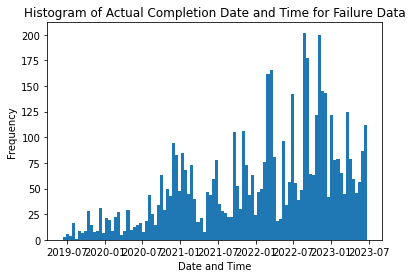

In [18]:
import matplotlib.pyplot as plt
failure = final_interventions[final_interventions["Failure_or_Maintenance"] == 1]
# Plot the histogram
plt.hist(failure['ActualCompletionDateTime'],bins=100)

# Adding labels and title
plt.xlabel('Date and Time')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Completion Date and Time for Failure Data')

# Display the plot
plt.show()

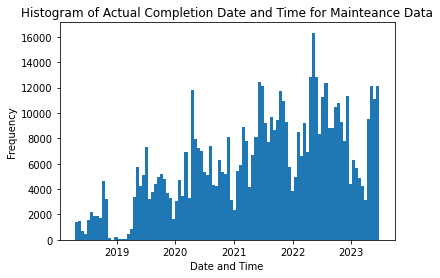

In [19]:
maintenance = final_interventions[final_interventions["Failure_or_Maintenance"] == 0]
# Plot the histogram
plt.hist(maintenance['ActualCompletionDateTime'],bins=100)

# Adding labels and title
plt.xlabel('Date and Time')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Completion Date and Time for Mainteance Data')

# Display the plot
plt.show()

In [20]:
from datetime import date
from dateutil.relativedelta import relativedelta
from dateutil import parser

In [21]:
final_interventions.sort_index(inplace=True)
final_interventions = final_interventions.sort_values(by=['ActualCompletionDateTime'], ascending=True)

In [22]:
final_interventions.sort_values(by='ActualCompletionDateTime', ascending = True)

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
61076,41221299,DRGU/015494,0,2018-04-16 21:08:14,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61047,41221270,DRGU/015493,0,2018-04-16 21:10:56,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61084,41221307,DRGU/015193,0,2018-04-16 21:14:07,1301,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61105,41221328,DRGU/015581,0,2018-04-16 21:17:23,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61063,41221286,DRGU/015097,0,2018-04-16 21:21:25,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367248,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
367246,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
574129,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying
574255,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying


In [23]:
data = final_interventions.groupby("CentralAssetID",as_index=False)["JobID"].count()

### Only keep assets which have had more than 1 interventions. We need this because we are having one intervention being one row. We need context to the failure or bit of maintenance. A failure on its own tells you little about the system

In [24]:
data = data[data["JobID"]>1]

In [25]:
final_interventions = final_interventions[final_interventions["CentralAssetID"].isin(data["CentralAssetID"])]

In [26]:
final_interventions

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
61076,41221299,DRGU/015494,0,2018-04-16 21:08:14,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61047,41221270,DRGU/015493,0,2018-04-16 21:10:56,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61084,41221307,DRGU/015193,0,2018-04-16 21:14:07,1301,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61105,41221328,DRGU/015581,0,2018-04-16 21:17:23,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61063,41221286,DRGU/015097,0,2018-04-16 21:21:25,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367248,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
367246,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
574129,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying
574255,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying


In [27]:
original = final_interventions.copy()

## To infill the NK values I have decided to infill the average wich is calculated below

In [28]:
number_of_cyc = final_interventions[["Failure_or_Maintenance"]].value_counts()[0]
number_of_react = final_interventions[["Failure_or_Maintenance"]].value_counts()[1]

In [29]:
number_of_cyc_nk = final_interventions[["ParameterValueID","Failure_or_Maintenance"]].value_counts().values[5]
number_of_react_nk = final_interventions[["ParameterValueID","Failure_or_Maintenance"]].value_counts().values[8]

In [30]:
print(f"Percentage of cyclic interventions that have nk as the percentage full value: {(number_of_cyc_nk/number_of_cyc)*100}%")

Percentage of cyclic interventions that have nk as the percentage full value: 3.311803687613789%


In [31]:
print(f"Percentage of reactive interventions that have nk as the percentage full value: {(number_of_react_nk/number_of_react)*100}%")

Percentage of reactive interventions that have nk as the percentage full value: 19.598550320602172%


In [32]:
print(f"Percentage of interventions which are reactive: {(number_of_react/(number_of_cyc+number_of_react))*100}%")

Percentage of interventions which are reactive: 0.6507572513987562%


In [33]:
50,25,75,100,0
154369, 153412,  90727,  64192,  32711

(154369, 153412, 90727, 64192, 32711)

In [34]:
(50*154369 + 25*153412 + 75*90727 + 64192*100 + 32711*0)/(154369 + 153412 + 90727 + 64192 +32711)

50.01397829277105

In [35]:
original

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
61076,41221299,DRGU/015494,0,2018-04-16 21:08:14,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61047,41221270,DRGU/015493,0,2018-04-16 21:10:56,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61084,41221307,DRGU/015193,0,2018-04-16 21:14:07,1301,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61105,41221328,DRGU/015581,0,2018-04-16 21:17:23,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61063,41221286,DRGU/015097,0,2018-04-16 21:21:25,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367248,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
367246,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
574129,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying
574255,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying


In [36]:
def replace_nk(row):
    if (row["ParameterValueID"] == 'NK')&(row["full_failure"]==1):
        return '7510'
    elif row["ParameterValueID"] == 'NK':
        return '2550'
    else:
        return row["ParameterValueID"]

In [37]:
final_interventions["ParameterValueID"] = final_interventions.apply(lambda x: replace_nk(x) ,axis=1)

In [38]:
final_interventions

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
61076,41221299,DRGU/015494,0,2018-04-16 21:08:14,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61047,41221270,DRGU/015493,0,2018-04-16 21:10:56,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61084,41221307,DRGU/015193,0,2018-04-16 21:14:07,1301,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61105,41221328,DRGU/015581,0,2018-04-16 21:17:23,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61063,41221286,DRGU/015097,0,2018-04-16 21:21:25,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367248,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
367246,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
574129,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying
574255,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying


In [294]:
import warnings
warnings.filterwarnings("ignore")  # silence warnings
from datetime import date
from dateutil.relativedelta import relativedelta
from dateutil import parser
import datetime
start_time = datetime.datetime.now()

# I want to identify the 
final_interventions[["ActualCompletionDateTime", "ExtractTimestamp"]] = final_interventions[["ActualCompletionDateTime", "ExtractTimestamp"]].apply(pd.to_datetime)
final_interventions.sort_values(by='ActualCompletionDateTime', inplace=True, ascending = True)
output = {"Days_Since_Maintenance":[],"JobID":[],'Previous_pvalue':[],'Previous_type_of_maintenance':[]}
for name, group in final_interventions.groupby("CentralAssetID"):
    times = group["ActualCompletionDateTime"]
    jobs = group["JobID"]
    pvalues = group["ParameterValueID"]
    types_of_maintenance = group["type_of_maintenance"]
    start = 0 
    for time, job, pvalue,type_of_maintenance in zip(times,jobs,pvalues,types_of_maintenance):
        if start == 0:
            previous = time
            start = 1
            prev_pvalue = pvalue
            prev_type_of_maintenance = type_of_maintenance
        else:
            diff = time - previous
            output["Days_Since_Maintenance"].append(diff)
            output["JobID"].append(job)
            output["Previous_pvalue"].append(prev_pvalue)
            output["Previous_type_of_maintenance"].append(prev_type_of_maintenance)
            prev_type_of_maintenance = type_of_maintenance
            prev_pvalue = pvalue
            previous = time

output = pd.DataFrame(output)
output["Days_Since_Maintenance"] = output["Days_Since_Maintenance"].apply(lambda x: x.days)
final_interventions = pd.merge(final_interventions,output,how="left",on="JobID")
final_interventions = final_interventions[~final_interventions["Days_Since_Maintenance"].isna()]

end_time = datetime.datetime.now()
print(end_time-start_time)

0:00:26.097085


In [295]:
final_interventions.drop(columns=['type_of_maintenance'],inplace=True)

## Investigate data distribution between regions

In [296]:
final_interventions.prefix.value_counts()

SW21    141253
NW13    120936
NW10     75395
EA68     47733
SE04     24511
MD09      2117
NE12       938
SO03       177
2000       105
MD07        74
NE14        21
Name: prefix, dtype: int64

In [297]:
final_interventions[["prefix","Failure_or_Maintenance"]].value_counts()

prefix  Failure_or_Maintenance
SW21    0                         140562
NW13    0                         120896
NW10    0                          75359
EA68    0                          47017
SE04    0                          24076
MD09    0                           1702
NE12    0                            932
EA68    1                            716
SW21    1                            691
SE04    1                            435
MD09    1                            415
SO03    0                            154
2000    0                            105
MD07    1                             74
NW13    1                             40
NW10    1                             36
SO03    1                             23
NE14    1                             21
NE12    1                              6
dtype: int64

### As you can see the following Prefixes do not have any cyclic maintenance, this will highly skew the data. The prefixes are: NE14, MD07, 2000. They will be removed

In [298]:
final_interventions = final_interventions[final_interventions["prefix"].isin(["SW21","NW13","NW10","EA68","SE04","MD09","NE12","SO03"])]

In [299]:
final_interventions.prefix.value_counts()

SW21    141253
NW13    120936
NW10     75395
EA68     47733
SE04     24511
MD09      2117
NE12       938
SO03       177
Name: prefix, dtype: int64

In [301]:
final_interventions.RouteID.value_counts()

1305    10723
1803     8779
M502     8187
1812     7532
M501     7268
        ...  
4228        1
E012        1
NO94        1
A386        1
A394        1
Name: RouteID, Length: 599, dtype: int64

In [302]:
final_interventions.to_csv("../new_approach_data.csv")

## End of pipeline

In [118]:
final_interventionsinal_interventions.groupby("CentralAssetID").filter(lambda group: group.size > 5)

In [134]:
failure_count = 0
maintenance_count = 0
names = []
for name, group in final_interventions.groupby("CentralAssetID"):
    if len(group) >5:
        for index, row in group.iterrows():
            if row["Failure_or_Maintenance"] == 1:
                failure_count +=1
                names.append(name)
            else:
                maintenance_count +=1

In [132]:
failure_count

591

In [133]:
maintenance_count

156816

In [143]:
names = list(set(names))

Each row is an intervention and failure or not should be used (this might just be full,covered or broken)

it has information on whether it failed in the previous 6 months or the previous year
it has information on when it was last maintained

### For cyclic maintenance activities I want to keep the ActualCompletionDateTime as the only date. 
### For Reactive maintenance activities I want to keep the first instance of it as that is the first date when the failure was realised
### If one value of the % full values is null then we need to infill that as it should be the same as its one asset and one intervention -- SOLVED -- Turns out IsCurrentFlag was set to 0 for some causing duplicates - Solved with the line below 

### If 'cyclic' interventions are performed at random, then you can simply compare the outcomes of 'cyclic' intervention versus the outcomes of 'reactive' intervention over a fixed period of time that would be meaningful. The plot below shows that there is more cyclic maintenance in the spring summer and autumn months compared to the winter months. It could be valuable to add a "Season" variable

<AxesSubplot: xlabel='ActualCompletionDateTime'>

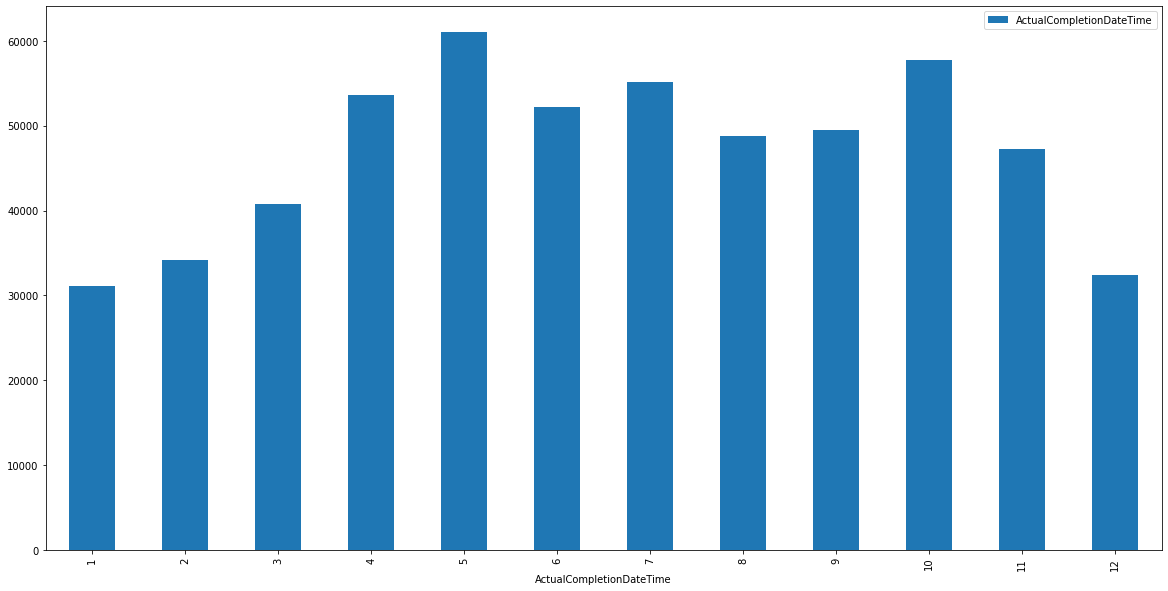

In [407]:
import matplotlib.pyplot as plt 
x = interventions[interventions["Failure_or_Maintenance"]==0][["ActualCompletionDateTime"]]
x["ActualCompletionDateTime"] = x["ActualCompletionDateTime"].astype("datetime64")
x.groupby(x["ActualCompletionDateTime"].dt.month).count().plot(kind="bar",figsize=(20,10))

### Import Meaning of the Percentage Full Parameter Values

### Full drains can be verified by the percentage full numbers

## Process Attributes

In [2]:
import pandas as pd

In [292]:
attributes = pd.read_csv("/home/tgraham/Documents/MSC/project_data/newest_attributes_extraction.csv",names=['SiteID', 'PlotNo', 'CentralAssetID', "AttrHD52","AttrNameHD5","AttrHD41",
"AttrNameHD41",
"AttrHD39",
"AttrNameHD39",
"AttrHD57",
"AttrNameHD57",
"AttrHD51",
"AttrNameHD51",
"AttrHD76",
"AttrNameHD76",
"AttrHD14",
"AttrNameHD14",
"AttrHD06",
"AttrNameHD06",
"AttrHD13",
"AttrNameHD13",
"AttrHD16",
"AttrNameHD16",
"AttrHD17",
"AttrNameHD17",
"AttrHD07",
"AttrNameHD07",
"AttrHD19",
"AttrNameHD19",
"AttrXSP",
"AttrNameXSP",
"AttrHD05",
"AttrNameHD05",
"AttrHD04",
"AttrNameHD04","ExtractTimestamp"], header=None,index_col=False)

In [293]:
attributes = attributes.drop(columns=["SiteID","PlotNo","AttrNameHD5",
                         "AttrNameHD41","AttrNameHD39","AttrNameHD57",
                         "AttrNameHD51","AttrNameHD76","AttrNameHD14",
                         "AttrNameHD06","AttrNameHD13","AttrNameHD16",
                        "AttrNameHD17","AttrNameHD07","AttrNameHD19",
                        "AttrNameXSP","AttrNameHD05","AttrNameHD04"])

In [296]:
len(attributes["CentralAssetID"].unique())

412872

In [300]:
attributes = attributes.drop_duplicates(subset='CentralAssetID')

In [301]:
attributes.isna().sum()

CentralAssetID           0
AttrHD52            398125
AttrHD41            397858
AttrHD39            397419
AttrHD57            397330
AttrHD51            383104
AttrHD76            369382
AttrHD14            315892
AttrHD06            312922
AttrHD13            306665
AttrHD16            291721
AttrHD17            290079
AttrHD07            272258
AttrHD19            257034
AttrXSP             133019
AttrHD05            134011
AttrHD04            125316
ExtractTimestamp         0
dtype: int64

In [302]:
attributes = attributes[["CentralAssetID","AttrXSP","ExtractTimestamp"]]
attributes = attributes.dropna()

In [306]:
attributes

,CentralAssetID,AttrXSP,ExtractTimestamp
0,DR/HEA10/DRGU/033796,LE,2023-06-26 14:09:30.410
3,DR/HEA10/DRGU/014994,LE,2023-06-26 14:09:30.410
4,DR/HEA10/DRGU/013967,LE,2023-06-26 14:09:30.410
5,DR/HEA10/DRGU/012667,RE,2023-06-26 14:09:30.410
6,A21DRGU/058612,L,2023-06-26 14:09:30.410
...,...,...,...
412868,A03PO/DRGU075755,LE,2023-06-26 14:09:30.410
412869,A03PO/DRGU075752,LE,2023-06-26 14:09:30.410
412870,A21DRGU/027339,L,2023-06-26 14:09:30.410
412871,A21DRGU/027309,L,2023-06-26 14:09:30.410


In [304]:
merged = pd.merge(final_interventions,attributes,on="CentralAssetID")

In [305]:
merged

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp_x,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,Days_Since_Maintenance,Previous_pvalue,AttrXSP,ExtractTimestamp_y
0,41221402,DRGU/006174,0,2018-10-14 21:00:53,1101,0-25,2023-06-26 13:52:59.520,0,NW13,0,0,0,0.0,0-25,LE,2023-06-26 14:09:30.410
1,41302891,DRGU/006174,0,2019-09-21 21:14:12,1101,0-25,2023-06-26 13:52:59.520,0,NW13,0,0,0,342.0,0-25,LE,2023-06-26 14:09:30.410
2,41822786,DRGU/006174,0,2020-08-30 20:20:02,1101,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,343.0,0-25,LE,2023-06-26 14:09:30.410
3,49672702,DRGU/006174,0,2021-10-29 21:49:50,1101,0-25,2023-06-26 13:52:59.520,0,NW13,0,0,0,425.0,5075,LE,2023-06-26 14:09:30.410
4,45218589,DRGU/006174,0,2022-12-30 23:40:25,1101,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,427.0,0-25,LE,2023-06-26 14:09:30.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386769,45751217,DR/HEA10/DRGU/000890,0,2023-06-24 00:06:13,M016,5075,2023-06-26 13:52:59.520,0,NW10,0,0,0,1408.0,0-25,LE,2023-06-26 14:09:30.410
386770,45751078,DR/HEA10/DRGU/000701,0,2023-06-24 00:06:21,M016,5075,2023-06-26 13:52:59.520,0,NW10,0,0,0,1408.0,0-25,LE,2023-06-26 14:09:30.410
386771,46590560,A68DRGU/028395,1,2023-06-24 00:13:08,E050,2550,2023-06-26 13:52:59.520,0,EA68,0,0,0,410.0,0-25,LE,2023-06-26 14:09:30.410
386772,45751097,DR/HEA10/DRGU/000916,0,2023-06-24 01:23:37,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,371.0,2550,LE,2023-06-26 14:09:30.410


In [130]:
attribute_names = {"AttributeTypeID":["HD41",
"HD76",
"HD39",
"HD19",
"HD14",
"HD51",
"HD05",
"HD16",
"XSP",
"HD17",
"HD13",
"HD04",
"HD57",
"HD06",
"HD07",
"HD52"],
"AttributeName":["Chamber Shape",
                "Construction year in YYYY",
                "Asset cleaned prior to insp",
                "Grating",
                "Manhole Construction Type",
                "Sump",
                "Drainage Owner",
                "Chamber Shape",
                "XSP Code",
                "Cover Duty",
                "Is Side Entry in item Y/N",
                "Drainage System Type",
                "Cover or grating hinged Y/N",
                "Strategic Drain",
                "Location Type Code",
                "Trapped Gully Outlet"],
"AttributeDescription":["ADMM  Inventory - The shape code of the chamber cross-section"
,"NULL"
,"NULL"
,"ADMM  Inventory - Indicates the presence of a grating"
,"ADMM  Inventory - Manhole construction type"
,"ADMM  Inventory - Indicates presence of sump"
,"ADMM  Operational - The owner of the item"
,"ADMM  Inventory - The shape code of the cover"
, "ADMM  Inventory - Defines the location of the asset across the carriageway"
,"ADMM  Inventory - The duty of the cover"
,"NULL"
,"ADMM  Inventory - The type of drainage system"
,"ADMM  Inventory - Indicates whether the cover (or grating) is hinged"
,"NULL"
,"ADMM  Inventory - Location type code"
,"ADMM  Inventory - Gully outlet is trapped"]}

In [131]:
attribute_names_df = pd.DataFrame(attribute_names)
attribute_names_df

,AttributeTypeID,AttributeName,AttributeDescription
0,HD41,Chamber Shape,ADMM Inventory - The shape code of the chambe...
1,HD76,Construction year in YYYY,NULL
2,HD39,Asset cleaned prior to insp,NULL
3,HD19,Grating,ADMM Inventory - Indicates the presence of a ...
4,HD14,Manhole Construction Type,ADMM Inventory - Manhole construction type
5,HD51,Sump,ADMM Inventory - Indicates presence of sump
6,HD05,Drainage Owner,ADMM Operational - The owner of the item
7,HD16,Chamber Shape,ADMM Inventory - The shape code of the cover
8,XSP,XSP Code,ADMM Inventory - Defines the location of the ...
9,HD17,Cover Duty,ADMM Inventory - The duty of the cover
